In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def parabola(x, a, b, c, s):
    y = a*(x**2) + b*x + c
    y += s * np.random.randn(len(y))
    return y

In [22]:
def tr_matr(arr):
    tr = [[]]
    for i in range(len(arr[0])):
        for j in range(len(arr)):
            tr[i].append(arr[j][i])
        if i != len(arr[0])-1:
            tr.append([])
    return tr   

In [23]:
def opred_matr(arr):
    opr=0.
    if len(arr) == 2:
        opr=arr[0][0]*arr[1][1]-arr[0][1]*arr[1][0]
    else:
        for i in range(len(arr)):
            tmpi=i
            tmpOpr=1.
            for j in range(len(arr)):
                tmpOpr*=arr[tmpi][j]
                tmpi+=1
                if tmpi == len(arr):
                    tmpi=0
            opr+=tmpOpr
        for i in range(len(arr)):
            tmpi=i
            tmpOpr=1.
            for j in range(len(arr))[::-1]:
                tmpOpr*=arr[tmpi][j]
                tmpi+=1
                if tmpi == len(arr):
                    tmpi=0
            opr-=tmpOpr
    return opr 

In [24]:
def obr_matr(arr):
    opr=opred_matr(arr)
    if opr != 0:
        obr=[[]]
        tmp_arr = arr.copy()
        tmp_arr = tr_matr(tmp_arr)
        for i in range(len(tmp_arr)):
            for j in range(len(tmp_arr)):
                dop_arr = []
                for i2 in range(len(tmp_arr)):
                    for j2 in range(len(tmp_arr)):
                        if i2!=i and j2!=j:
                            dop_arr.append(tmp_arr[i2][j2])
                dop_arr2=[[dop_arr[0],dop_arr[1]],[dop_arr[2],dop_arr[3]]]
                obr.append(round(((-1)**(i+j+2))*(opred_matr(dop_arr2)),10))
        obr=obr[1:]
        for i in range(len(obr)):
            obr[i]=obr[i]/opr        
        obr=np.array(obr).reshape(3,3)         
        return obr
    else:
        raise Exception('ERROR:opredelitel = 0')

In [25]:
def arr3x3_x_vect1x3(arr,vect):
    vect_out = [0.,0.,0.]
    for i in range(3):
        for j in range(3):
            vect_out[i]+=arr[i][j]*vect[j]
    return vect_out[::-1]           

In [26]:
a=10.1223
b=21.123
c=21.123
s=30000.3
XYp={'x':np.array(np.arange(1,250,9.9))}
XYp['y']=parabola(XYp['x'], a, b, c, s)

n=len(XYp['x'])
sumX = sum(XYp['x'])
sumY = sum(XYp['y'])
sumXY = 0.
sumXqrt = 0.
sum_Xqrt_Y = 0.
sumXqrt3 = 0.
sumXqrt4 = 0.

for i in range(len(XYp['y'])):
    sumXY += XYp['x'][i]*XYp['y'][i]
    sumXqrt += XYp['x'][i]**2
    sum_Xqrt_Y += (XYp['x'][i]**2)*XYp['y'][i]
    sumXqrt3 += XYp['x'][i]**3
    sumXqrt4 += XYp['x'][i]**4

for i in range(len(XYp['y'])):
    print('point ',i,'[X=',XYp['x'][i],',Y=',XYp['y'][i],']')

print('\nsumX ',sumX)
print('sumY ',sumY)
print('sumXY ',sumXY)
print('sumXqrt ',sumXqrt)
print('sum_Xqrt_Y ',sum_Xqrt_Y)
print('sumXqrt3 ',sumXqrt3)
print('sumXqrt4 ',sumXqrt4)

point  0 [X= 1.0 ,Y= -43383.469813883916 ]
point  1 [X= 10.9 ,Y= 16205.308472872555 ]
point  2 [X= 20.8 ,Y= -649.3992439788535 ]
point  3 [X= 30.700000000000003 ,Y= 48992.82103680936 ]
point  4 [X= 40.6 ,Y= 71031.00176782117 ]
point  5 [X= 50.5 ,Y= 19265.382745473642 ]
point  6 [X= 60.400000000000006 ,Y= 31163.746874077915 ]
point  7 [X= 70.3 ,Y= 54021.093898976535 ]
point  8 [X= 80.2 ,Y= 104754.95985500855 ]
point  9 [X= 90.10000000000001 ,Y= 93089.75860127667 ]
point  10 [X= 100.0 ,Y= 109755.1771164777 ]
point  11 [X= 109.9 ,Y= 104364.48075477281 ]
point  12 [X= 119.80000000000001 ,Y= 158333.75183575798 ]
point  13 [X= 129.70000000000002 ,Y= 154231.70066342686 ]
point  14 [X= 139.6 ,Y= 239799.75828552837 ]
point  15 [X= 149.5 ,Y= 227457.23261989086 ]
point  16 [X= 159.4 ,Y= 268279.86656484706 ]
point  17 [X= 169.3 ,Y= 333140.353988727 ]
point  18 [X= 179.20000000000002 ,Y= 325757.3162256208 ]
point  19 [X= 189.1 ,Y= 389272.3862602042 ]
point  20 [X= 199.0 ,Y= 422361.1232186699 ]
poin

In [27]:
obr_m = obr_matr([[n,      sumX,    sumXqrt ],
                  [sumX,   sumXqrt, sumXqrt3],
                  [sumXqrt,sumXqrt3,sumXqrt4]])
vect = [sumY,
        sumXY,
        sum_Xqrt_Y]

abc_koef_parabola = arr3x3_x_vect1x3(obr_m,vect)
print(abc_koef_parabola)

[8.677624700988076, 321.90205233545566, -3136.962490443606]


In [28]:
XYf = {'x':XYp['x'].copy(),
       'y':[(abc_koef_parabola[0]*(x**2)+abc_koef_parabola[1]*x+abc_koef_parabola[2]) for x in XYp['x']]}
print(XYf)

{'x': array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
        90.1, 100. , 109.9, 119.8, 129.7, 139.6, 149.5, 159.4, 169.3,
       179.2, 189.1, 199. , 208.9, 218.8, 228.7, 238.6, 248.5]), 'y': [-2806.3828134071623, 1402.7584707372544, 7312.8877487693535, 14924.00502068914, 24236.1102864966, 35249.20354619175, 47963.284799774585, 62378.354047245084, 78494.4112886033, 96311.45652384918, 115829.48975298273, 137048.51097600398, 159968.52019291293, 184589.51740370956, 210911.50260839378, 238934.47580696578, 268658.4369994254, 300083.38618577283, 333209.3233660079, 368036.2485401305, 404564.1617081409, 442793.06287003896, 482722.95202582475, 524353.8291754982, 567685.6943190594, 612718.547456508]}


Text(1.0, 637212.1283324299, 'y = (8.678)x²+(321.902)x+(-3136.962)')

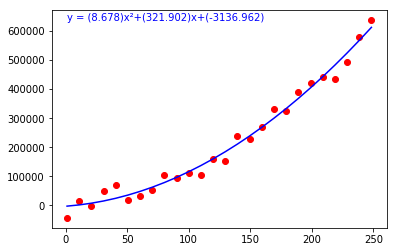

In [29]:
plt.plot(XYp['x'],XYp['y'],'ro')
plt.plot(XYf['x'],XYf['y'],'b')
plt.text(min(XYp['x']),max(XYp['y']),'y = ('+str(round(abc_koef_parabola[0],3))+')x²+('+str(round(abc_koef_parabola[1],3))+')x+('+str(round(abc_koef_parabola[2],3))+')',color='blue')